**Predicting Customer Churn in Telecommunications Industry Using Machine Learning**

Relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from google.colab import files
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


**Data Collection**

In [3]:
data = files.upload()

Saving Churn.csv to Churn.csv


In [4]:
df = pd.read_csv('Churn.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Load the dataset
telecom_data = pd.read_csv('Churn.csv')

# Display first few rows and summary statistics
print(telecom_data.head())
print(telecom_data.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
#data preprocessing
telecom_data = pd.read_csv('Churn.csv')
#Data cleaning
telecom_data.dropna(inplace=True)
#Feature engineering
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')


**Visualisation**


Distribution

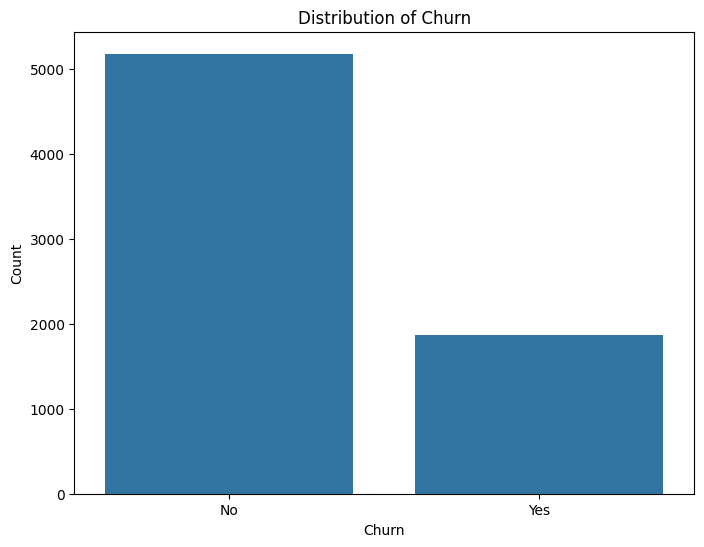

In [7]:
# Count plot of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=telecom_data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


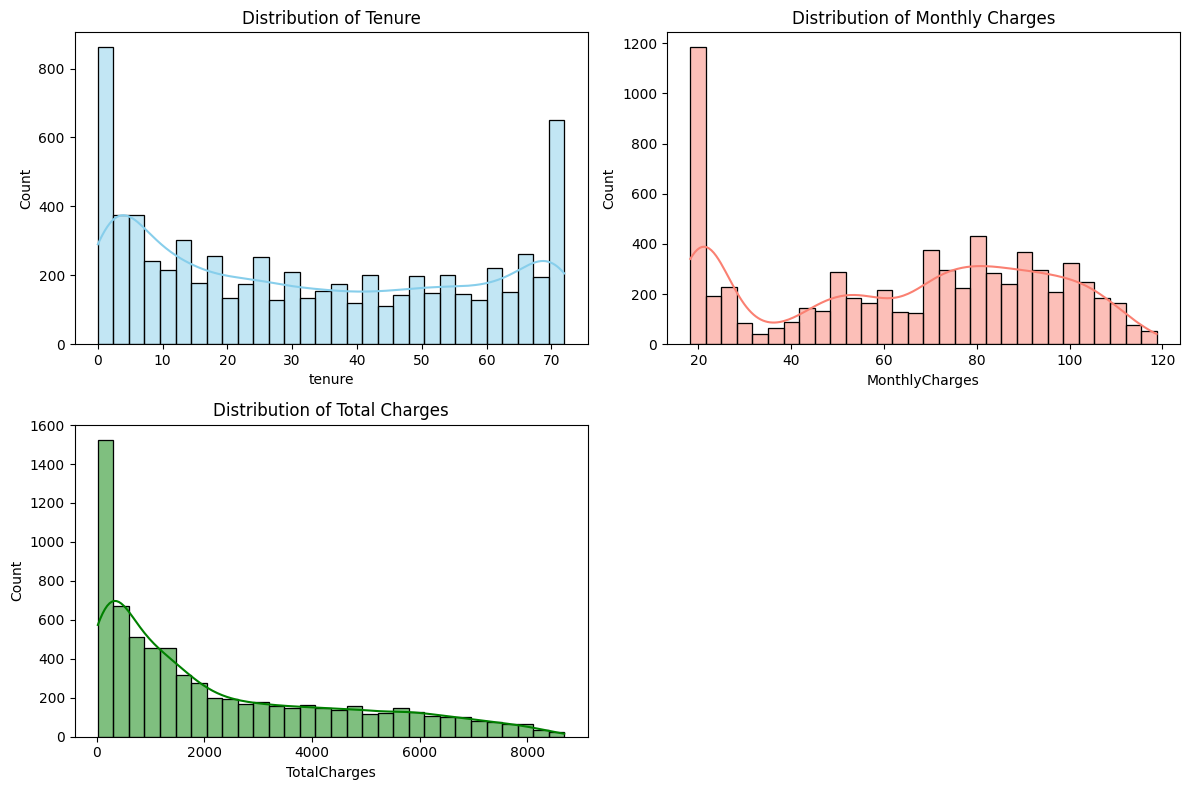

In [8]:
# Numeric feature distributions
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(telecom_data['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')

plt.subplot(2, 2, 2)
sns.histplot(telecom_data['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')

plt.subplot(2, 2, 3)
sns.histplot(telecom_data['TotalCharges'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


**Random Forest**

In [9]:
df = df.drop('customerID', axis=1)

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 0.7970
Precision: 0.6654
Recall: 0.4692
ROC AUC: 0.8376


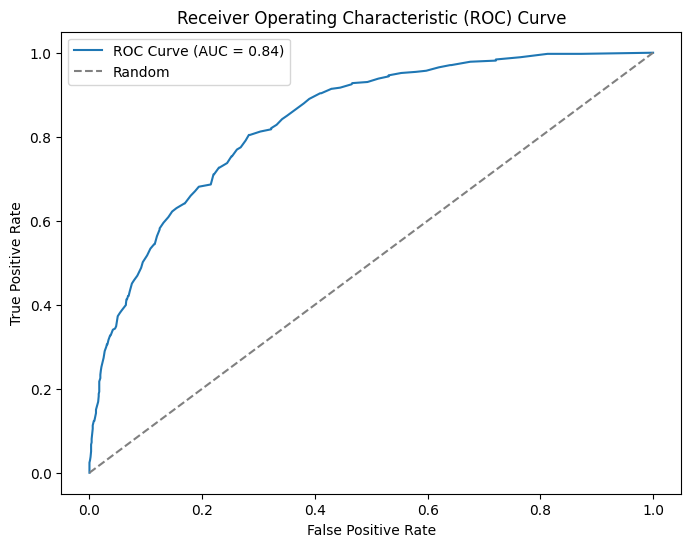

In [10]:
# Predict probabilities and classes
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class
y_pred = model.predict(X_test)  # Predicted classes

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Feature ranking:
1. Feature 'MonthlyCharges' - Importance: 0.175779699727488
2. Feature 'tenure' - Importance: 0.17177450902833885
3. Feature 'TotalCharges' - Importance: 0.16871035496175893
4. Feature 'Contract' - Importance: 0.08185673487327316
5. Feature 'OnlineSecurity' - Importance: 0.05383811456133099
6. Feature 'PaymentMethod' - Importance: 0.05181016187239523
7. Feature 'TechSupport' - Importance: 0.04256857046771347
8. Feature 'gender' - Importance: 0.028479677668662932
9. Feature 'OnlineBackup' - Importance: 0.0266018993211908
10. Feature 'PaperlessBilling' - Importance: 0.025873157020686047
11. Feature 'DeviceProtection' - Importance: 0.024420747860787576
12. Feature 'Partner' - Importance: 0.02363950933996504
13. Feature 'InternetService' - Importance: 0.023128901880624834
14. Feature 'MultipleLines' - Importance: 0.022175808063599613
15. Feature 'SeniorCitizen' - Importance: 0.020191024908892286
16. Feature 'Dependents' - Importance: 0.018984850915500485
17. Feature 'Strea

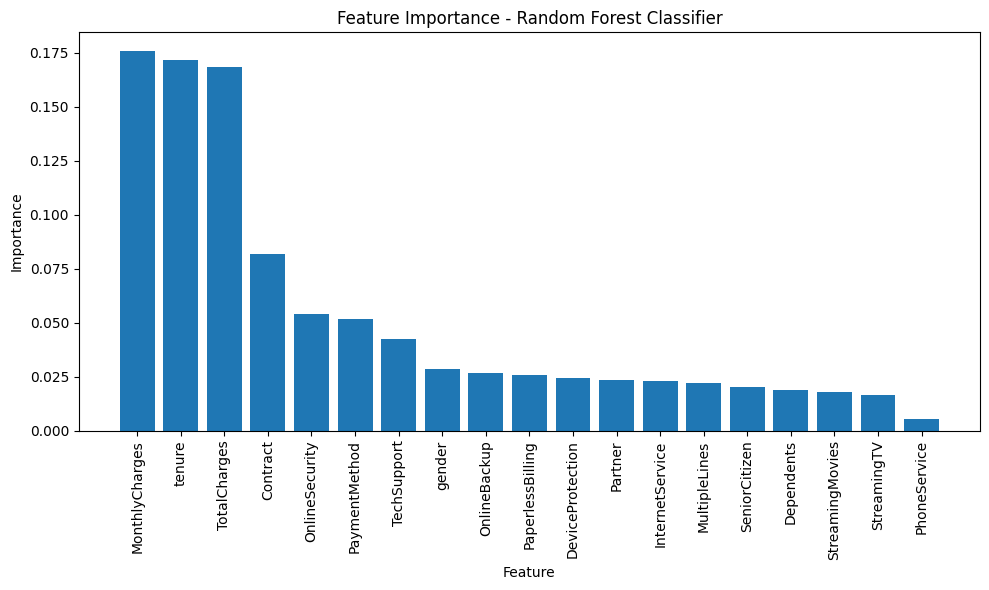

In [11]:
# Train the Random Forest Classifier
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Get feature names from your dataset
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Print feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{sorted_feature_names[f]}' - Importance: {importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest Classifier")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


**Logistic Regression**

In [12]:
# Initialize the logistic regression model
model_lr = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [13]:
# Predict on the test data
y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8155
Precision: 0.6840
Recall: 0.5630
ROC AUC: 0.8601
